In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('nursing_homes.csv')
dataset.shape


(15082, 29)

In [307]:
dataset['special_focus_status']=dataset['special_focus_status'].fillna(value='No')
dataset=dataset.dropna()
dataset.shape

(10423, 29)

In [308]:
grouped=dataset.groupby(['provider_state'])
avg=grouped['overall_rating'].mean()
type(avg)

pandas.core.series.Series

Text(0, 0.5, 'Average Rating per state')

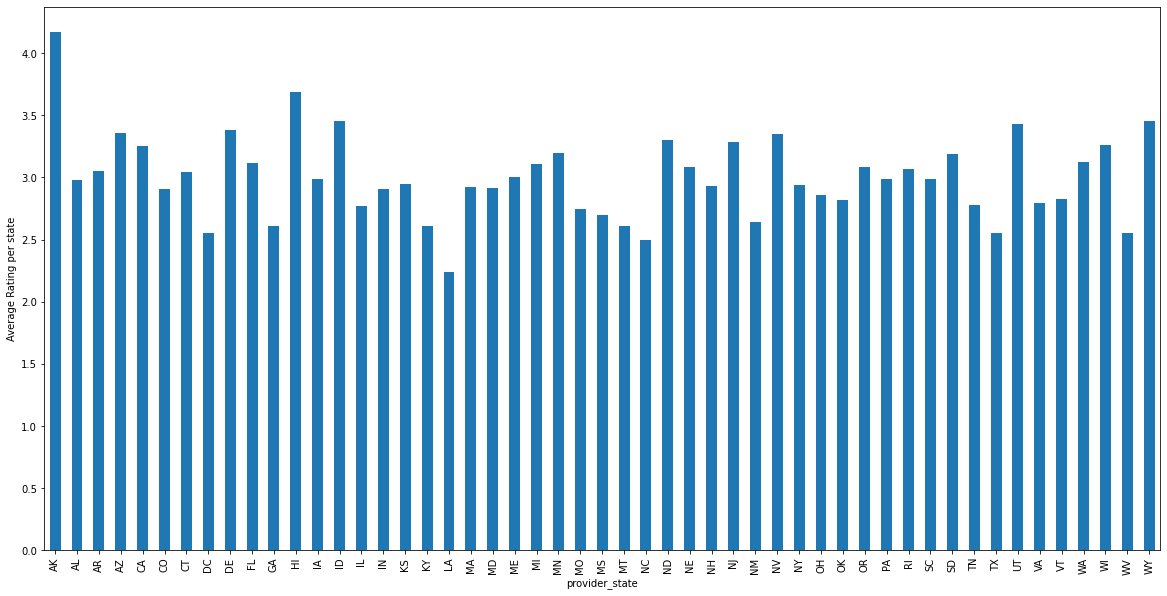

In [309]:
avg.plot(kind='bar',figsize=(20,10))
plt.ylabel("Average Rating per state")

                                     number_of_certified_beds  \
number_of_certified_beds                             1.000000   
average_number_of_residents_per_day                  0.903002   

                                     average_number_of_residents_per_day  
number_of_certified_beds                                        0.903002  
average_number_of_residents_per_day                             1.000000  


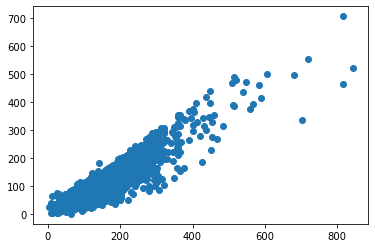

In [310]:
plt.scatter(dataset['number_of_certified_beds'],dataset['average_number_of_residents_per_day'])
subset=dataset[['number_of_certified_beds','average_number_of_residents_per_day']]
print(subset.corr())
plt.show()

In [311]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['abuse_icon']=le.fit_transform(dataset['abuse_icon'])

Text(0, 0.5, 'Percentage of Homes Labeled with Abuse Icon')

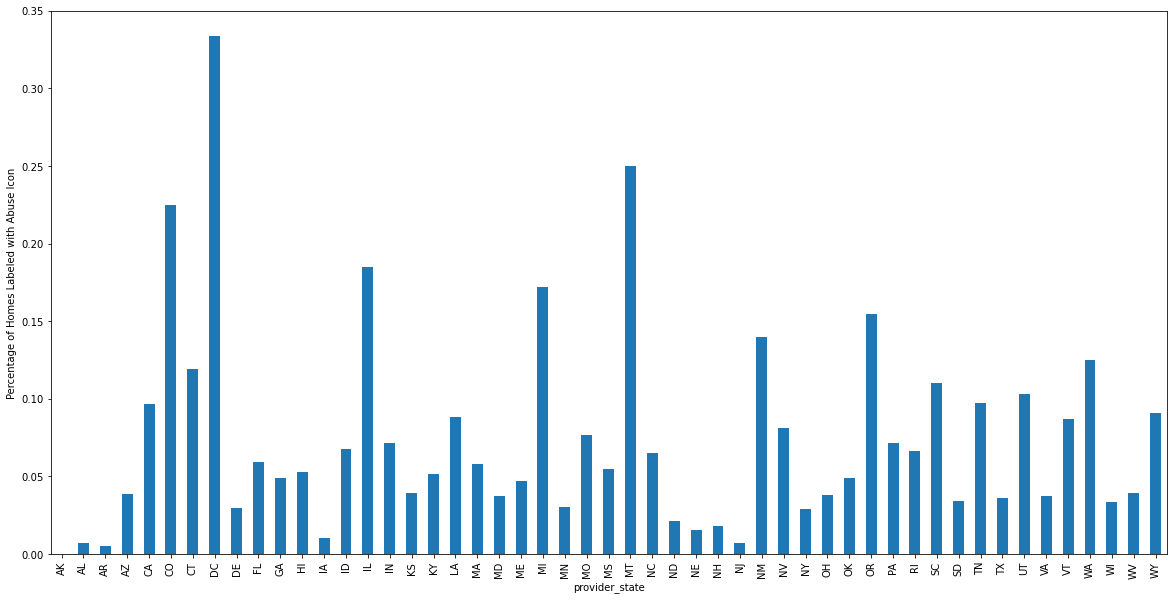

In [312]:
abuse=dataset.groupby(['provider_state']).mean()
abuse['abuse_icon'].plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage of Homes Labeled with Abuse Icon')

Text(0, 0.5, 'Number of homes')

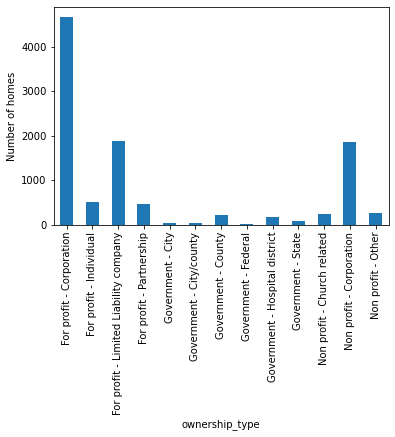

In [313]:
ownership=dataset.groupby('ownership_type')
ownership['ownership_type'].count().plot(kind='bar')
plt.ylabel("Number of homes")

In [314]:
reco_system_data=dataset.copy()
reco_system_data.shape

(10423, 29)

In [315]:
reco_system_data=reco_system_data.drop(['provider_state','provider_zip_code','ownership_type','provider_type'],axis=1)
reco_system_data.shape

(10423, 25)

In [316]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_licensed_staffing_hours_per_resident_per_day,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties
4,PLANTATION MANOR NURSING HOME,103,84.6,N,N,No,0,Y,Resident,Yes,...,1.09792,3.22409,0.14552,1.0,0,2,0.0,2,0,2
6,MERRY WOOD LODGE,124,95.8,N,N,No,0,Y,Resident,Yes,...,1.10740,3.28756,0.26307,0.0,0,2,0.0,0,0,0
7,HATLEY HEALTH CARE INC,201,85.8,N,N,No,0,N,Both,Yes,...,2.03030,3.70992,0.58237,0.0,1,0,0.0,0,0,0
10,KELLER LANDING,109,71.0,N,N,No,0,N,Resident,Yes,...,1.61009,3.29073,0.35334,4.0,0,0,0.0,0,0,0
12,DIVERSICARE OF FOLEY,154,106.4,N,N,SFF Candidate,0,Y,Resident,Yes,...,1.25783,3.04335,0.48237,0.0,3,2,0.0,1,0,1


In [317]:
reco_system_data.shape

(10423, 25)

In [318]:
i=LabelEncoder()
reco_system_data['provider_resides_in_hospital']=i.fit_transform(reco_system_data['provider_resides_in_hospital'])

In [319]:
reco_system_data['continuing_care_retirement_community']=i.fit_transform(reco_system_data['continuing_care_retirement_community'])
reco_system_data['special_focus_status']=i.fit_transform(reco_system_data['special_focus_status'])
reco_system_data['most_recent_health_inspection_more_than_2_years_ago']=i.fit_transform(reco_system_data['most_recent_health_inspection_more_than_2_years_ago'])
reco_system_data['with_a_resident_and_family_council']=i.fit_transform(reco_system_data['with_a_resident_and_family_council'])

In [320]:
reco_system_data['automatic_sprinkler_systems_in_all_required_areas']=i.fit_transform(reco_system_data['automatic_sprinkler_systems_in_all_required_areas'])

In [321]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_licensed_staffing_hours_per_resident_per_day,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties
4,PLANTATION MANOR NURSING HOME,103,84.6,0,0,0,0,1,3,2,...,1.09792,3.22409,0.14552,1.0,0,2,0.0,2,0,2
6,MERRY WOOD LODGE,124,95.8,0,0,0,0,1,3,2,...,1.10740,3.28756,0.26307,0.0,0,2,0.0,0,0,0
7,HATLEY HEALTH CARE INC,201,85.8,0,0,0,0,0,0,2,...,2.03030,3.70992,0.58237,0.0,1,0,0.0,0,0,0
10,KELLER LANDING,109,71.0,0,0,0,0,0,3,2,...,1.61009,3.29073,0.35334,4.0,0,0,0.0,0,0,0
12,DIVERSICARE OF FOLEY,154,106.4,0,0,1,0,1,3,2,...,1.25783,3.04335,0.48237,0.0,3,2,0.0,1,0,1


In [322]:
addon=reco_system_data['overall_rating'].copy()
reco_system_data=reco_system_data.drop('overall_rating',axis=1)
reco_system_data['overall_rating']=addon


In [323]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties,overall_rating
4,PLANTATION MANOR NURSING HOME,103,84.6,0,0,0,0,1,3,2,...,3.22409,0.14552,1.0,0,2,0.0,2,0,2,2.0
6,MERRY WOOD LODGE,124,95.8,0,0,0,0,1,3,2,...,3.28756,0.26307,0.0,0,2,0.0,0,0,0,2.0
7,HATLEY HEALTH CARE INC,201,85.8,0,0,0,0,0,0,2,...,3.70992,0.58237,0.0,1,0,0.0,0,0,0,3.0
10,KELLER LANDING,109,71.0,0,0,0,0,0,3,2,...,3.29073,0.35334,4.0,0,0,0.0,0,0,0,5.0
12,DIVERSICARE OF FOLEY,154,106.4,0,0,1,0,1,3,2,...,3.04335,0.48237,0.0,3,2,0.0,1,0,1,1.0


In [324]:
from sklearn.model_selection import train_test_split
X=reco_system_data.values[:,:-1]
Y=reco_system_data.values[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [325]:
x_train.shape

(8338, 24)

In [326]:
x_test.shape

(2085, 24)

In [327]:
nearest_neighbors_name=x_train[:,0]
x_train=np.delete(x_train,0,axis=1)
x_test=np.delete(x_test,0,axis=1)

In [328]:
x_train

array([[88, 82.9, 0, ..., 11, 0, 11],
       [74, 62.6, 0, ..., 0, 0, 0],
       [150, 107.9, 0, ..., 1, 0, 1],
       ...,
       [27, 23.3, 0, ..., 4, 0, 4],
       [80, 44.6, 0, ..., 3, 0, 3],
       [120, 105.9, 0, ..., 16, 0, 16]], dtype=object)

In [329]:
nearest_neighbors_name

array(['LAKE CITY SCRANTON HEALTHCARE CENTER', 'GROVE AT WASHINGTON, THE',
       'AMERICAN VILLAGE', ..., 'HILL TOP HOUSE',
       'TEXAN NURSING & REHAB OF GONZALES',
       'MAJESTIC CARE OF NORTH VERNON'], dtype=object)

<AxesSubplot:>

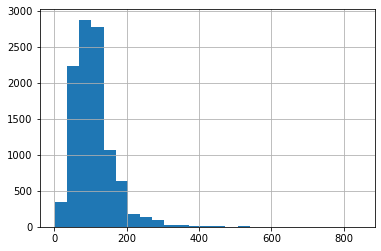

In [330]:
dataset['number_of_certified_beds'].hist(bins=25)

<AxesSubplot:>

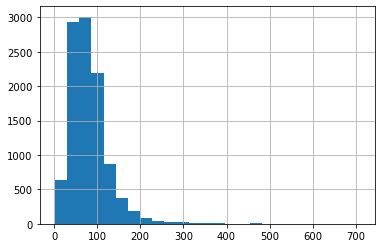

In [331]:
dataset['average_number_of_residents_per_day'].hist(bins=25)

In [332]:
x_train.shape

(8338, 23)

In [333]:
x_test.shape

(2085, 23)

In [334]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [335]:
x_train

array([[-0.35580227,  0.03444105, -0.14684462, ...,  3.34726381,
        -0.35905859,  3.08365306],
       [-0.59711623, -0.39598023, -0.14684462, ..., -0.74056797,
        -0.35905859, -0.75273894],
       [ 0.71287383,  0.56451652, -0.14684462, ..., -0.3689469 ,
        -0.35905859, -0.40397603],
       ...,
       [-1.40724167, -1.22925887, -0.14684462, ...,  0.74591631,
        -0.35905859,  0.64231269],
       [-0.49369596, -0.77763457, -0.14684462, ...,  0.37429524,
        -0.35905859,  0.29354978],
       [ 0.19577249,  0.52211048, -0.14684462, ...,  5.20536916,
        -0.35905859,  4.8274676 ]])

In [336]:
x_test

array([[ 3.68139607e-01,  3.03719385e-01, -1.46844620e-01, ...,
        -3.68946896e-01, -3.59058587e-01, -4.03976035e-01],
       [-4.41985829e-01, -3.19649367e-01, -1.46844620e-01, ...,
         4.09050595e+00,  6.14926858e+00,  4.82746760e+00],
       [-1.01079731e+00, -8.13679704e-01, -1.46844620e-01, ...,
        -3.68946896e-01, -3.59058587e-01, -4.03976035e-01],
       ...,
       [-2.00671870e-01,  2.50711838e-01, -1.46844620e-01, ...,
        -7.40567966e-01, -3.59058587e-01, -7.52738944e-01],
       [ 5.40506721e-01,  6.02681949e-01, -1.46844620e-01, ...,
        -3.68946896e-01, -3.59058587e-01, -4.03976035e-01],
       [ 1.28168531e+00,  4.09734479e-01, -1.46844620e-01, ...,
         2.67417417e-03, -3.59058587e-01, -5.52131255e-02]])

Fit train data to KNN and find the n nearest neighbors to each test data point

Given the n nearest training points to each test point, calculate the similarity between each neighbor and test point

In [337]:

from sklearn.neighbors import KNeighborsRegressor

# Creating and training the KNN model
n_neighbors =5
knn = KNeighborsRegressor(n_neighbors=n_neighbors)
knn.fit(x_train, y_train)

# Finding the n nearest neighbors for each test data point
distances, indices = knn.kneighbors(x_test)
#each gives 2-D array of distances or indices per test point

# At last Getting the actual data points (nursing home names) of the nearest neighbors
nearest_neighbors_data = nearest_neighbors_name[indices]
#2-D array as well
# Print the nearest neighbors' data and their corresponding distances for each test data point

for i in range(len(x_test)):
    print(f"Test data point {i + 1}:")
    print("Nearest Neighbors:")
    for j in range(n_neighbors):
        print(f"{j + 1}. {nearest_neighbors_data[i, j]} (Distance: {distances[i, j]:.2f})")
    print()

Test data point 1:
Nearest Neighbors:
1. HAMPTON COURT NURSING AND REHABILITATION CENTER (Distance: 1.20)
2. TWIN RIVERS REHABILITATION AND HEALTHCARE CENTER (Distance: 1.23)
3. TRINITY TRACE COMMUNITY CARE CENTER (Distance: 1.29)
4. PALM GARDEN OF TAMPA (Distance: 1.33)
5. MANOR OAKS NURSING & REHABILITATION CENTER (Distance: 1.33)

Test data point 2:
Nearest Neighbors:
1. GENESIS SENIOR LIVING (Distance: 4.17)
2. VANTAGE AT SOUTH HADLEY LLC (Distance: 4.32)
3. CASCADES AT SENIOR REHAB (Distance: 5.07)
4. POLARIS HEALTH & WELLNESS OF ASHTON COURT (Distance: 5.56)
5. KADIMA REHABILITATION & NURSING AT LAKESIDE (Distance: 5.59)

Test data point 3:
Nearest Neighbors:
1. SAINT FRANCIS REHABILITATION AND NURSING CENTER (Distance: 0.90)
2. STONEHENGE OF OGDEN (Distance: 0.92)
3. THE LIVING CENTRE (Distance: 1.12)
4. REGENCY CANYON LAKES REHAB AND NURSING CENTER (Distance: 1.21)
5. NHC HEALTHCARE, SCOTT (Distance: 1.27)

Test data point 4:
Nearest Neighbors:
1. THE PARK IN PLANO (Distance: 1

1. HILLCREST CONVALESCENT CENTER (Distance: 1.56)
2. LUTHER MEMORIAL HOME (Distance: 1.80)
3. VINEYARD HILLS HEALTH CENTER (Distance: 2.00)
4. MAINE VETERANS HOME - BANGOR (Distance: 2.06)
5. ALLEGAN COUNTY MEDICAL CARE FA (Distance: 2.10)

Test data point 296:
Nearest Neighbors:
1. MERCY HARVARD HOSPITAL CARE CENTER (Distance: 1.62)
2. DOOR COUNTY MEMORIAL HOSPITAL SNF (Distance: 1.93)
3. HEINZ TRANSITIONAL REHABILITATION UNIT (Distance: 2.10)
4. MACNEAL HOSPITAL SNF (Distance: 2.38)
5. GULF COAST MEDICAL CENTER SKILLED NURSING UNIT (Distance: 2.46)

Test data point 297:
Nearest Neighbors:
1. WILLOW SPRINGS REHABILITATION AND HEALTHCARE CTR (Distance: 0.97)
2. PALM GARDEN OF VERO BEACH (Distance: 1.37)
3. MANOR AT PENN VILLAGE, THE (Distance: 1.45)
4. HEARTLAND HEALTH CARE CENTER - GREENVILLE EAST (Distance: 1.45)
5. TERRACE OF JACKSONVILLE, THE (Distance: 1.49)

Test data point 298:
Nearest Neighbors:
1. HERITAGE HEALTH-CHILLICOTHE (Distance: 1.81)
2. NORTHBRIDGE HEALTH CARE CENTER (

1. THE PINNACLE REHABILITATION AND NURSING CENTER (Distance: 1.51)
2. PRESIDENTIAL POST-ACUTE (Distance: 1.62)
3. OZARK NURSING AND CARE CENTER (Distance: 1.66)
4. FALLBROOK SKILLED NURSING (Distance: 1.66)
5. HERITAGE HOUSE OF RICHMOND (Distance: 1.68)

Test data point 530:
Nearest Neighbors:
1. WESTWARD HEIGHTS CARE CENTER (Distance: 1.37)
2. TWIN WILLOWS NURSING CENTER (Distance: 1.39)
3. MAPLE MANOR REHAB CENTER (Distance: 1.42)
4. KIOWA HOSPITAL DISTRICT MANOR (Distance: 1.44)
5. AKRON  CARE CENTER, INC (Distance: 1.52)

Test data point 531:
Nearest Neighbors:
1. GROSSMONT POST ACUTE CARE (Distance: 0.98)
2. CASTLE MANOR CONVALESCENT CENTER (Distance: 1.27)
3. ATLANTIC MEMORIAL HEALTHCARE CENTER (Distance: 1.36)
4. CAMARILLO HEALTHCARE CENTER (Distance: 1.58)
5. NHC HEALTHCARE, KINGSPORT (Distance: 1.60)

Test data point 532:
Nearest Neighbors:
1. CHELSEA REHABILITATION AND HEALTHCARE CENTER (Distance: 1.27)
2. CHARDON CENTER (Distance: 1.29)
3. LIBERTY COMMONS NSG & REHAB  CTR OF

Nearest Neighbors:
1. WILKINSON COUNTY SENIOR CARE (Distance: 1.43)
2. DIVERSICARE OF BROOKHAVEN (Distance: 1.51)
3. DELMAR NURSING & REHABILITATION CENTER (Distance: 1.65)
4. CLAIBORNE COUNTY SENIOR CARE (Distance: 1.65)
5. ELMWOOD MANOR NURSING HOME (Distance: 1.69)

Test data point 774:
Nearest Neighbors:
1. WILLIAMS BAY HEALTH SERVICES (Distance: 1.36)
2. WAYLAND NURSING AND REHABILITATION CENTER (Distance: 1.50)
3. ALTERCARE SOMERSET INC. (Distance: 1.67)
4. HARMAR VILLAGE CARE CENTER (Distance: 1.99)
5. SHELBYVILLE REHAB & HLTH C CTR (Distance: 2.11)

Test data point 775:
Nearest Neighbors:
1. FORT BEND HEALTHCARE CENTER (Distance: 1.27)
2. QUALITY LIFE SERVICES - MARKLEYSBURG (Distance: 1.56)
3. STROUD HEALTH CARE CENTER SOUTH (Distance: 1.66)
4. WHISPERING OAKS REHAB & NURSING (Distance: 1.67)
5. FOUNDERS PLAZA NURSING & REHAB (Distance: 1.68)

Test data point 776:
Nearest Neighbors:
1. HAVEN OF DOUGLAS (Distance: 0.73)
2. COOK WILLOW CONVALESCENT HOSPITAL (Distance: 1.07)
3. H

Test data point 998:
Nearest Neighbors:
1. PRESBYTERIAN HOMES OF ARDEN HILLS (Distance: 1.98)
2. MINNESOTA MASONIC HOME CARE CENTER (Distance: 2.05)
3. BALDOMERO LOPEZ MEMORIAL VETERANS NURSING HOME (Distance: 2.16)
4. SOUTHINGTON CARE CENTER (Distance: 2.39)
5. N Y S VETERANS HOME (Distance: 2.43)

Test data point 999:
Nearest Neighbors:
1. CHARDON CENTER (Distance: 1.00)
2. BUCKEYE CARE AND REHABILITATION (Distance: 1.22)
3. AMBLER EXTENDED CARE CENTER (Distance: 1.23)
4. OAKS - LIMESTONE, THE (Distance: 1.28)
5. VALLEY GRANDE MANOR (Distance: 1.31)

Test data point 1000:
Nearest Neighbors:
1. RIVERSIDE HEIGHTS HEALTHCARE CENTER, LLC (Distance: 1.72)
2. MEMORIAL CITY HEALTH AND REHABILITATION CENTER (Distance: 1.77)
3. EMERALD NURSING & REHAB COLUMBUS (Distance: 1.81)
4. SHEBOYGAN SENIOR COMMUNITY INC (Distance: 1.83)
5. NURSING AND REHABILITATION CENTER AT GOOD SHEPHERD (Distance: 1.93)

Test data point 1001:
Nearest Neighbors:
1. SMOKY HILL REHABILITATION CENTER (Distance: 1.75)
2.

Test data point 1332:
Nearest Neighbors:
1. MAJORA LANE CTR FOR REHAB & NSG CARE INC (Distance: 2.22)
2. CHRISTIAN PARK HEALTH CARE CENTER (Distance: 2.45)
3. CRA-MAR MEADOWS (Distance: 2.46)
4. WINSLOW HOUSE CARE CENTER (Distance: 2.47)
5. WILLOW SPRINGS CARE AND REHABILITATION (Distance: 2.50)

Test data point 1333:
Nearest Neighbors:
1. CADIA REHABILITATION SILVERSIDE (Distance: 1.91)
2. BETHESDA CARE CENTER (Distance: 1.94)
3. WEISER CARE OF CASCADIA (Distance: 2.13)
4. CARE ONE AT NEW BEDFORD (Distance: 2.24)
5. MEADOW VIEW NURSING AND REHABILITATION (Distance: 2.29)

Test data point 1334:
Nearest Neighbors:
1. CARLTON SHORES HEALTHCARE AND REHABILITATION CENTE (Distance: 1.80)
2. BROOKSIDE REHAB & NURSING CENTER (Distance: 1.96)
3. RIDGEWAY MANOR HEALTHCARE CENTER (Distance: 2.07)
4. TUCKER HOUSE NURSING AND REHABILITATION CENTER (Distance: 2.09)
5. TERRACE OF JACKSONVILLE, THE (Distance: 2.13)

Test data point 1335:
Nearest Neighbors:
1. HUDSON POINTE AT RIVERDALE CTR FOR NURSIN

Test data point 1638:
Nearest Neighbors:
1. HOYT NURSING & REHAB CENTRE (Distance: 2.18)
2. DELANO DISTRICT SKILLED NURSING FACILITY (Distance: 2.25)
3. GILROY HEALTHCARE AND REHABILITATION CENTER (Distance: 2.30)
4. LITTLE FALLS CARE CENTER (Distance: 2.61)
5. COMPLETE CARE AT GROTON REGENCY LLC (Distance: 2.65)

Test data point 1639:
Nearest Neighbors:
1. SCOTT HEALTH & REHABILITATION (Distance: 0.88)
2. CLARION HEALTHCARE AND REHABILITATION CENTER (Distance: 0.88)
3. STRATFORD HEALTHCARE CENTER (Distance: 0.89)
4. GUARDIAN HEALTHCARE HIGHLAND VIEW (Distance: 0.95)
5. JAMESON CARE CENTER (Distance: 0.95)

Test data point 1640:
Nearest Neighbors:
1. THE TIMBERS OF CASS COUNTY (Distance: 2.46)
2. WINDSOR VALLEJO NURSING & REHABILITATION CENTER (Distance: 2.67)
3. HERITAGE SPECIALTY CARE (Distance: 2.74)
4. GLENDORA CANYON TRANSITIONAL CARE UNIT (Distance: 2.75)
5. CENTRAL PARK REHABILITATION AND NURSING CENTER (Distance: 2.81)

Test data point 1641:
Nearest Neighbors:
1. STANLEYTOWN HE

Test data point 1953:
Nearest Neighbors:
1. BETHANY CENTER FOR REHABILITATION AND HEALING LLC (Distance: 1.98)
2. THE GRAND REHABILITATION AND NRSG AT RIVER VALLEY (Distance: 2.16)
3. SCHENECTADY CENTER FOR REHABILITATION AND NURSING (Distance: 2.18)
4. GLENWOOD HEALTH CENTER BY HARBORVIEW (Distance: 2.23)
5. GALLATIN  CENTER FOR REHABILITATION AND HEALING (Distance: 2.27)

Test data point 1954:
Nearest Neighbors:
1. MYSTIC HEALTHCARE & REHABILITATION CENTER, LLC (Distance: 1.06)
2. EMERALD COAST CENTER (Distance: 1.09)
3. MOUNTAIN VIEW CARE CENTER (Distance: 1.38)
4. GARDENS AT MILLVILLE, THE (Distance: 1.40)
5. WINTER PARK CARE AND REHABILITATION (Distance: 1.41)

Test data point 1955:
Nearest Neighbors:
1. COLONIAL OAKS LIVING CENTER (Distance: 1.46)
2. OAKS - ATHENS SKILLED NURSING, THE (Distance: 1.61)
3. BERNICE NURSING AND REHABILITATION CENTER, LLC (Distance: 1.77)
4. AMERICAN HEALTH COMMUNITIES OF CLARKSVILLE (Distance: 1.83)
5. SHEPHERD OF THE HILLS LIVING CENTER (Distance: 2

In [338]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.stats import pearsonr


# First Finding the n nearest neighbors for each test data point
distances, indices = knn.kneighbors(x_test)

# Then Getting the actual data points (nursing home names) of the nearest neighbors
nearest_neighbors_data = nearest_neighbors_name[indices]

# Calculating the Pearson correlation coefficients between each neighbor and test point
pearson_correlations = np.zeros((x_test.shape[0], n_neighbors))

for i in range(x_test.shape[0]):
    for j in range(n_neighbors):
        pearson_correlations[i, j], _ = pearsonr(x_test[i], x_train[indices[i, j]])

# Printing the nearest neighbors' data, distances, and Pearson correlation coefficients for each test data point
for i in range(len(x_test)):
    print(f"Test data point {i + 1}:")
    print("Nearest Neighbors:")
    for j in range(n_neighbors):
        print(f"{j + 1}. {nearest_neighbors_data[i, j]} (Distance: {distances[i, j]:.2f}, Pearson correlation: {pearson_correlations[i, j]:.2f})")
    print()


Test data point 1:
Nearest Neighbors:
1. HAMPTON COURT NURSING AND REHABILITATION CENTER (Distance: 1.20, Pearson correlation: 0.91)
2. TWIN RIVERS REHABILITATION AND HEALTHCARE CENTER (Distance: 1.23, Pearson correlation: 0.90)
3. TRINITY TRACE COMMUNITY CARE CENTER (Distance: 1.29, Pearson correlation: 0.83)
4. PALM GARDEN OF TAMPA (Distance: 1.33, Pearson correlation: 0.82)
5. MANOR OAKS NURSING & REHABILITATION CENTER (Distance: 1.33, Pearson correlation: 0.83)

Test data point 2:
Nearest Neighbors:
1. GENESIS SENIOR LIVING (Distance: 4.17, Pearson correlation: 0.95)
2. VANTAGE AT SOUTH HADLEY LLC (Distance: 4.32, Pearson correlation: 0.92)
3. CASCADES AT SENIOR REHAB (Distance: 5.07, Pearson correlation: 0.89)
4. POLARIS HEALTH & WELLNESS OF ASHTON COURT (Distance: 5.56, Pearson correlation: 0.88)
5. KADIMA REHABILITATION & NURSING AT LAKESIDE (Distance: 5.59, Pearson correlation: 0.89)

Test data point 3:
Nearest Neighbors:
1. SAINT FRANCIS REHABILITATION AND NURSING CENTER (Dist

1. OAK GROVE HEALTH CARE CENTER (Distance: 0.92, Pearson correlation: 0.92)
2. LAUREL RIDGE CENTER (Distance: 0.92, Pearson correlation: 0.92)
3. LEE COUNTY HEALTH AND REHABILITATION (Distance: 0.93, Pearson correlation: 0.92)
4. EVANSVILLE CARE CENTER (Distance: 1.01, Pearson correlation: 0.94)
5. PRUITTHEALTH - TOOMSBORO (Distance: 1.09, Pearson correlation: 0.91)

Test data point 255:
Nearest Neighbors:
1. OAK HILL HEALTH & REHABILITATION (Distance: 1.50, Pearson correlation: 0.90)
2. SALEMHAVEN (Distance: 1.53, Pearson correlation: 0.88)
3. CASA BONITA CONVALESCENT HOSPITAL (Distance: 1.55, Pearson correlation: 0.86)
4. ADVENTHEALTH CARE CENTER ZEPHYRHILL NORTH (Distance: 1.66, Pearson correlation: 0.81)
5. TRUMAN W SMITH CHILDREN'S CARE CENTER (Distance: 1.73, Pearson correlation: 0.85)

Test data point 256:
Nearest Neighbors:
1. PRUITTHEALTH - FORSYTH (Distance: 1.19, Pearson correlation: 0.87)
2. HERITAGE INN HEALTH AND REHABILITATION (Distance: 1.23, Pearson correlation: 0.86)


Nearest Neighbors:
1. WESTGATE NURSING & REHAB COMMUNITY (Distance: 1.37, Pearson correlation: 0.89)
2. LOCKPORT REHAB & HEALTH CARE CENTER (Distance: 1.53, Pearson correlation: 0.87)
3. BETHANY GARDENS SKILLED LIVING CENTER (Distance: 1.55, Pearson correlation: 0.87)
4. GAYMONT CARE AND REHABILITATION (Distance: 1.69, Pearson correlation: 0.80)
5. PINE ARBOR (Distance: 1.70, Pearson correlation: 0.83)

Test data point 567:
Nearest Neighbors:
1. PALM GARDEN OF JACKSONVILLE (Distance: 2.06, Pearson correlation: 0.95)
2. THE PALMS NURSING AND REHAB AT ORLANDO (Distance: 2.34, Pearson correlation: 0.94)
3. SENECA PLACE (Distance: 2.42, Pearson correlation: 0.93)
4. CRANFORD  PARK CARE (Distance: 2.52, Pearson correlation: 0.93)
5. BROADWAY MANOR NURSING HOME (Distance: 2.73, Pearson correlation: 0.91)

Test data point 568:
Nearest Neighbors:
1. JONES CO REST HOME (Distance: 1.77, Pearson correlation: 0.87)
2. WOODLANDS REHABILITATION AND HEALTHCARE CENTER (Distance: 1.84, Pearson correlat

Test data point 882:
Nearest Neighbors:
1. WHEATLAND NURSING & REHABILITATION CENTER (Distance: 1.36, Pearson correlation: 0.87)
2. YATES OPERATOR, LLC (Distance: 1.45, Pearson correlation: 0.90)
3. PARKVIEW HEALTH CARE FACILITY (Distance: 1.50, Pearson correlation: 0.85)
4. EUFAULA MANOR NURSING AND REHABILITATION CENTER (Distance: 1.53, Pearson correlation: 0.87)
5. H & J VONDERLIETH LVG CTR, THE (Distance: 1.53, Pearson correlation: 0.83)

Test data point 883:
Nearest Neighbors:
1. GUEST HOUSE (THE) (Distance: 3.67, Pearson correlation: 0.93)
2. WATERS OF CLIFTY FALLS, THE (Distance: 3.82, Pearson correlation: 0.90)
3. BRICKYARD HEALTHCARE - RICHMOND CARE CENTER (Distance: 3.92, Pearson correlation: 0.91)
4. BOULDER POST ACUTE (Distance: 4.02, Pearson correlation: 0.89)
5. AVALON HEALTH & REHABILITATION CENTER - PASCO (Distance: 4.21, Pearson correlation: 0.84)

Test data point 884:
Nearest Neighbors:
1. EMBASSY OF VALLEY VIEW (Distance: 1.08, Pearson correlation: 0.92)
2. VALLEY HE

Test data point 1147:
Nearest Neighbors:
1. NORWALK MEMORIAL HOME (Distance: 1.81, Pearson correlation: 0.97)
2. MENIG NURSING HOME (Distance: 1.92, Pearson correlation: 0.97)
3. MACKINAC STRAITS LONG TERM CARE UNIT (Distance: 2.05, Pearson correlation: 0.97)
4. WATER'S EDGE (Distance: 2.16, Pearson correlation: 0.96)
5. CALHOUN NURSING HOME (Distance: 2.21, Pearson correlation: 0.96)

Test data point 1148:
Nearest Neighbors:
1. ST LUKES LUTHERAN CARE CENTER (Distance: 1.80, Pearson correlation: 0.96)
2. ST ANNS HOME (Distance: 1.88, Pearson correlation: 0.94)
3. BETHANY SKILLED NURSING FACILITY (Distance: 1.91, Pearson correlation: 0.92)
4. BALDOMERO LOPEZ MEMORIAL VETERANS NURSING HOME (Distance: 2.01, Pearson correlation: 0.92)
5. GOOD SAMARITAN AMBASSADOR (Distance: 2.08, Pearson correlation: 0.91)

Test data point 1149:
Nearest Neighbors:
1. AUTUMN CARE OF NORFOLK (Distance: 1.60, Pearson correlation: 0.92)
2. STERLING CARE BEL AIR (Distance: 1.67, Pearson correlation: 0.91)
3. RI


Test data point 1435:
Nearest Neighbors:
1. KIRKWOOD MANOR (Distance: 1.76, Pearson correlation: 0.88)
2. VERMILLION CONVALESCENT CENTER (Distance: 1.80, Pearson correlation: 0.85)
3. SEDONA TRACE HEALTH AND WELLNESS CENTER (Distance: 1.81, Pearson correlation: 0.85)
4. AZALEA HEALTH & REHAB CENTER (Distance: 1.84, Pearson correlation: 0.84)
5. RAVENSWOOD VILLAGE (Distance: 1.84, Pearson correlation: 0.85)

Test data point 1436:
Nearest Neighbors:
1. SOUTHWOOD AT NORWELL NURSING CTR (Distance: 1.02, Pearson correlation: 0.96)
2. KIRKHAVEN (Distance: 1.14, Pearson correlation: 0.93)
3. GLADES WEST REHABILITATION AND NURSING C (Distance: 1.32, Pearson correlation: 0.92)
4. STONERISE MOUNDSVILLE (Distance: 1.50, Pearson correlation: 0.89)
5. JERSEY SHORE CENTER (Distance: 1.54, Pearson correlation: 0.93)

Test data point 1437:
Nearest Neighbors:
1. CROWN HEIGHTS CENTER FOR NURSING AND REHAB (Distance: 2.42, Pearson correlation: 0.93)
2. COMPLETE CARE AT HYATTSVILLE (Distance: 2.53, Pears

Nearest Neighbors:
1. WHITESTONE CARE CENTER (Distance: 1.59, Pearson correlation: 0.93)
2. THE VILLA AT OSSEO (Distance: 2.03, Pearson correlation: 0.88)
3. SOUTH ROANOKE NURSING AND REHABILITATION (Distance: 2.05, Pearson correlation: 0.88)
4. CRAWFORD MANOR HEALTHCARE CENTER (Distance: 2.13, Pearson correlation: 0.91)
5. JACKSON RIDGE REHABILITATION AND CARE CENTER (Distance: 2.31, Pearson correlation: 0.86)

Test data point 1759:
Nearest Neighbors:
1. ALTERCARE OF ALLIANCE CTR FOR REHAB & NC INC (Distance: 0.81, Pearson correlation: 0.92)
2. BELLE VIEW ESTATES REHABILITATION AND CARE CENTER (Distance: 0.94, Pearson correlation: 0.89)
3. SIENA GARDENS REHABILITATION & TRANSITIONAL CARE (Distance: 1.03, Pearson correlation: 0.88)
4. NORTH HILLS LIFE CARE AND REHAB (Distance: 1.05, Pearson correlation: 0.87)
5. DAVIE NURSING AND REHABILITATION CENTER (Distance: 1.08, Pearson correlation: 0.84)

Test data point 1760:
Nearest Neighbors:
1. THE ORCHARDS AT WARREN (Distance: 1.94, Pearson

3. ARBORS AT STOW (Distance: 2.08, Pearson correlation: 0.86)
4. SEMINOLE CARE AND REHABILITATION CENTER (Distance: 2.09, Pearson correlation: 0.85)
5. TREVISO TRANSITIONAL CARE (Distance: 2.10, Pearson correlation: 0.88)

Test data point 2017:
Nearest Neighbors:
1. AUTUMN CARE OF ALTAVISTA (Distance: 0.90, Pearson correlation: 0.95)
2. BRICKYARD HEALTHCARE - WOODLANDS CARE CENTER (Distance: 0.93, Pearson correlation: 0.93)
3. BOSTONIAN NURSING CARE & REHABILITATION CTR, THE (Distance: 1.04, Pearson correlation: 0.91)
4. MEADOW PARK REHABILITATION AND HEALTH CENTER L L C (Distance: 1.07, Pearson correlation: 0.93)
5. ORWIGSBURG NURSING AND REHABILITATION  CENTER (Distance: 1.07, Pearson correlation: 0.91)

Test data point 2018:
Nearest Neighbors:
1. GLENOAKS SENIOR LIVING CAMPUS (Distance: 2.06, Pearson correlation: 0.79)
2. WELBROOK CENTENNIAL HILLS, LLC (Distance: 2.06, Pearson correlation: 0.84)
3. CHAPMAN VALLEY MANOR (Distance: 2.16, Pearson correlation: 0.82)
4. WILLOWBROOKE COUR

Predict the rating for each test data

In [339]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr

# Getting Pearson Correlation from previous step
# Then Calculating the weighted average of the nearest neighbors' ratings using Pearson correlation coefficients
predicted_ratings = np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):
    average=np.mean(x_test[i])
    weighted_sum = 0
    weight_sum = 0
    for j in range(n_neighbors):
        weighted_sum += y_train[indices[i, j]] * pearson_correlations[i, j]
        weight_sum += abs(pearson_correlations[i, j])
    predicted_ratings[i] = round(average+(weighted_sum / weight_sum))

# Print the nearest neighbors' data, distances, Pearson correlation coefficients, and predicted ratings for each test data point
for i in range(len(x_test)):
    print(f"Test data point {i + 1}:")
    print("Nearest Neighbors:")
    for j in range(n_neighbors):
        print(f"{j + 1}. {nearest_neighbors_data[i, j]} (Distance: {distances[i, j]:.2f}, Pearson correlation: {pearson_correlations[i, j]:.2f})")
    print(f"Predicted Rating: {predicted_ratings[i]:.2f}")
    print()


Test data point 1:
Nearest Neighbors:
1. HAMPTON COURT NURSING AND REHABILITATION CENTER (Distance: 1.20, Pearson correlation: 0.91)
2. TWIN RIVERS REHABILITATION AND HEALTHCARE CENTER (Distance: 1.23, Pearson correlation: 0.90)
3. TRINITY TRACE COMMUNITY CARE CENTER (Distance: 1.29, Pearson correlation: 0.83)
4. PALM GARDEN OF TAMPA (Distance: 1.33, Pearson correlation: 0.82)
5. MANOR OAKS NURSING & REHABILITATION CENTER (Distance: 1.33, Pearson correlation: 0.83)
Predicted Rating: 4.00

Test data point 2:
Nearest Neighbors:
1. GENESIS SENIOR LIVING (Distance: 4.17, Pearson correlation: 0.95)
2. VANTAGE AT SOUTH HADLEY LLC (Distance: 4.32, Pearson correlation: 0.92)
3. CASCADES AT SENIOR REHAB (Distance: 5.07, Pearson correlation: 0.89)
4. POLARIS HEALTH & WELLNESS OF ASHTON COURT (Distance: 5.56, Pearson correlation: 0.88)
5. KADIMA REHABILITATION & NURSING AT LAKESIDE (Distance: 5.59, Pearson correlation: 0.89)
Predicted Rating: 2.00

Test data point 3:
Nearest Neighbors:
1. SAINT F

Nearest Neighbors:
1. LAKE POINTE REHABILITATION AND NURSING CENTER (Distance: 1.03, Pearson correlation: 0.84)
2. ENVIVE OF SULLIVAN (Distance: 1.06, Pearson correlation: 0.78)
3. VALLEY OAKS CARE CENTER (Distance: 1.14, Pearson correlation: 0.75)
4. WOODSIDE VILLAGE CARE CENTER (Distance: 1.19, Pearson correlation: 0.80)
5. JOE-ANNE BURGIN HEALTH AND REHABILITATION (Distance: 1.22, Pearson correlation: 0.69)
Predicted Rating: 2.00

Test data point 120:
Nearest Neighbors:
1. SAN LUIS POST ACUTE CENTER (Distance: 1.64, Pearson correlation: 0.81)
2. ASHTON PLACE HEALTH AND REHAB, LLC (Distance: 1.66, Pearson correlation: 0.83)
3. OAK RIDGE HEALTH AND REHABILITATION (Distance: 1.67, Pearson correlation: 0.85)
4. VILLAGES OF JACKSON CREEK, THE (Distance: 1.68, Pearson correlation: 0.84)
5. W D BILL MANNING TENNESSEE STATE VETERANS HOME (Distance: 1.68, Pearson correlation: 0.85)
Predicted Rating: 5.00

Test data point 121:
Nearest Neighbors:
1. AUTUMN CARE OF NASH (Distance: 1.33, Pearson

5. COMMANDER NURSING CENTER (Distance: 2.02, Pearson correlation: 0.78)
Predicted Rating: 3.00

Test data point 288:
Nearest Neighbors:
1. UNIVERSAL HEALTH CARE / OXFORD (Distance: 1.37, Pearson correlation: 0.93)
2. HERITAGE HALL BIG STONE GAP (Distance: 1.58, Pearson correlation: 0.90)
3. HILLCREST CENTER (Distance: 1.71, Pearson correlation: 0.87)
4. POTTSTOWN SKILLED NURSING AND REHABILITATION CENTE (Distance: 1.80, Pearson correlation: 0.86)
5. NORFOLK HEALTH AND REHABILITATION CENTER (Distance: 1.84, Pearson correlation: 0.86)
Predicted Rating: 1.00

Test data point 289:
Nearest Neighbors:
1. DEER'S HEAD CENTER (Distance: 3.18, Pearson correlation: 0.98)
2. CAPITOL VIEW TRANSITIONAL CARE CENTER (Distance: 3.94, Pearson correlation: 0.93)
3. WISSOTA HEALTH AND REGIONAL VENT CENTER (Distance: 4.11, Pearson correlation: 0.92)
4. PRIDE TLC THERAPY AND LIVING CAMPUS (Distance: 4.12, Pearson correlation: 0.94)
5. PRESBYTERIAN COMMUNITIES OF SOUTH CAROLINA- CLINTO (Distance: 4.36, Pears

3. THE SHORE WINDS, L L C (Distance: 1.64, Pearson correlation: 0.94)
4. LAKELAND NURSING & REHAB (Distance: 1.90, Pearson correlation: 0.93)
5. FISHKILL CENTER FOR REHABILITATION AND NURSING (Distance: 1.91, Pearson correlation: 0.92)
Predicted Rating: 2.00

Test data point 403:
Nearest Neighbors:
1. WILLOW PARK HEALTH CARE CENTER (Distance: 1.98, Pearson correlation: 0.92)
2. BRICKYARD HEALTHCARE - BROOKVIEW CARE CENTER (Distance: 2.22, Pearson correlation: 0.91)
3. PIEDMONT HILLS CENTER FOR NURSING AND REHAB (Distance: 2.25, Pearson correlation: 0.90)
4. BRICKYARD HEALTHCARE - PORTAGE CARE CENTER (Distance: 2.30, Pearson correlation: 0.90)
5. BRICKYARD HEALTHCARE - BRANDYWINE CARE CENTER (Distance: 2.37, Pearson correlation: 0.89)
Predicted Rating: 2.00

Test data point 404:
Nearest Neighbors:
1. COMMUNITY SPRINGS HEALTHCARE FACILITY (Distance: 1.60, Pearson correlation: 0.94)
2. MARSHALL MANOR NURSING HOME (Distance: 1.64, Pearson correlation: 0.94)
3. SANSBURY CARE CENTER (Distanc

3. CENTER AT CENTERPLACE, LLC, THE (Distance: 1.74, Pearson correlation: 0.89)
4. WELLSPRINGS THERAPY CENTER OF GILBERT (Distance: 1.74, Pearson correlation: 0.88)
5. THE PRESERVE (Distance: 1.75, Pearson correlation: 0.88)
Predicted Rating: 4.00

Test data point 515:
Nearest Neighbors:
1. FATHER BAKER MANOR (Distance: 1.39, Pearson correlation: 0.95)
2. HOMEVIEW CENTER OF FRANKLIN (Distance: 1.51, Pearson correlation: 0.95)
3. SOUTHINGTON CARE CENTER (Distance: 1.68, Pearson correlation: 0.92)
4. EDGEWATER AT WATERMAN VILLAGE (Distance: 1.88, Pearson correlation: 0.91)
5. WESTVIEW HEALTH CARE CENTER (Distance: 1.89, Pearson correlation: 0.90)
Predicted Rating: 5.00

Test data point 516:
Nearest Neighbors:
1. LAURELWOOD HEALTHCARE CENTER (Distance: 2.00, Pearson correlation: 0.93)
2. WINDSOR NURSING AND REHABILITATION CENTER OF BASTR (Distance: 2.32, Pearson correlation: 0.88)
3. RIDGEWAY NURSING & REHABILITATION FACILITY (Distance: 2.32, Pearson correlation: 0.89)
4. YORK MANOR NURSIN

1. PINERS NURSING HOME (Distance: 1.48, Pearson correlation: 0.93)
2. ST JOSEPH'S HOME AL & NC, INC (Distance: 1.61, Pearson correlation: 0.93)
3. CALDWELL CARE OF CASCADIA (Distance: 1.82, Pearson correlation: 0.90)
4. MCLARNEY HEALTHCARE (Distance: 2.04, Pearson correlation: 0.89)
5. SIGNATURE HEALTHCARE AT JACKSON MANOR REHAB & WELL (Distance: 2.07, Pearson correlation: 0.85)
Predicted Rating: 2.00

Test data point 622:
Nearest Neighbors:
1. PROMEDICA SKILLED NURSING AND REHAB- WILMINGTON (Distance: 0.92, Pearson correlation: 0.97)
2. ALLEGANY HEALTH NURSING AND REHAB (Distance: 1.17, Pearson correlation: 0.95)
3. COMPLETE CARE AT LAPLATA LLC (Distance: 1.17, Pearson correlation: 0.95)
4. COLDSPRING TRANSITIONAL CARE CENTER (Distance: 1.21, Pearson correlation: 0.96)
5. BROOKWOOD SKILLED NURSING AND THERAPY (Distance: 1.28, Pearson correlation: 0.94)
Predicted Rating: 5.00

Test data point 623:
Nearest Neighbors:
1. GOLDEN YEARS NURSING CENTER (Distance: 1.19, Pearson correlation: 0

3. CRYSTAL RIDGE CARE CENTER (Distance: 1.16, Pearson correlation: 0.78)
4. BROOKRIDGE COVE REHABILITATION AND CARE  CENTER (Distance: 1.20, Pearson correlation: 0.85)
5. HAWTHORNE CENTER FOR REHAB & HEALING  OF SARASOTA (Distance: 1.24, Pearson correlation: 0.75)
Predicted Rating: 3.00

Test data point 800:
Nearest Neighbors:
1. PRAIRIE HOUSE LIVING CENTER (Distance: 1.66, Pearson correlation: 0.88)
2. DOCTORS SUBACUTE HEALTHCARE, LLC (Distance: 1.72, Pearson correlation: 0.86)
3. WESTFIELD REHABILITATION AND HEALTH CENTER (Distance: 1.80, Pearson correlation: 0.84)
4. JACKSONVILLE HEALTHCARE CENTER (Distance: 1.84, Pearson correlation: 0.84)
5. MCCREA MANOR NSNG AND REHAB CTR LLC (Distance: 1.84, Pearson correlation: 0.85)
Predicted Rating: 3.00

Test data point 801:
Nearest Neighbors:
1. BETHANY HOME SOCIETY SAN JOAQUIN COUNTY (Distance: 1.01, Pearson correlation: 0.95)
2. VENTURA POST ACUTE (Distance: 1.22, Pearson correlation: 0.91)
3. TEMPLE CITY HEALTHCARE (Distance: 1.23, Pears


Test data point 918:
Nearest Neighbors:
1. SALUDE - THE ART OF RECOVERY (Distance: 1.05, Pearson correlation: 0.97)
2. CAPRICE HEALTH CARE CENTER (Distance: 1.53, Pearson correlation: 0.94)
3. SIENA SKILLED NURSING AND REHABILITATION CENTER (Distance: 1.81, Pearson correlation: 0.91)
4. LORIEN BULLE ROCK (Distance: 1.82, Pearson correlation: 0.90)
5. STONEHENGE OF OGDEN (Distance: 1.88, Pearson correlation: 0.90)
Predicted Rating: 5.00

Test data point 919:
Nearest Neighbors:
1. MAPLE LAWN MEDICAL CARE FACILI (Distance: 0.97, Pearson correlation: 0.97)
2. MOHUN HEALTH CARE CENTER (Distance: 1.20, Pearson correlation: 0.96)
3. CLOVER MANOR (Distance: 1.21, Pearson correlation: 0.97)
4. MAINE VETERANS HOME - BANGOR (Distance: 1.23, Pearson correlation: 0.95)
5. APOSTOLIC CHRISTIAN HOME OF EUREKA (Distance: 1.29, Pearson correlation: 0.95)
Predicted Rating: 5.00

Test data point 920:
Nearest Neighbors:
1. DECATUR MEDICAL LODGE (Distance: 2.30, Pearson correlation: 0.95)
2. SAN PEDRO MANO

Predicted Rating: 5.00

Test data point 1099:
Nearest Neighbors:
1. GUEST HOUSE SKILLED NURSING REHABILITATION (THE) (Distance: 2.08, Pearson correlation: 0.93)
2. FRESH RIVER HEALTHCARE (Distance: 2.28, Pearson correlation: 0.91)
3. GRANVILLE CENTER FOR REHABILITATION AND NURSING (Distance: 2.39, Pearson correlation: 0.91)
4. HILLTOP AT BLUE RIVER,THE (Distance: 2.43, Pearson correlation: 0.88)
5. MID CITY COMMUNITY NURSING AND REHAB (Distance: 2.56, Pearson correlation: 0.88)
Predicted Rating: 2.00

Test data point 1100:
Nearest Neighbors:
1. MEADOW GROVE TRANSITIONAL CARE (Distance: 0.65, Pearson correlation: 0.97)
2. AARON MANOR REHABILITATION AND NURSING CENTER (Distance: 0.71, Pearson correlation: 0.97)
3. PULASKI HLTH & REHAB CNTR (Distance: 0.79, Pearson correlation: 0.96)
4. LAUREL COURT (Distance: 0.84, Pearson correlation: 0.95)
5. JAMES RIVER NURSING AND REHABILITATION (Distance: 1.03, Pearson correlation: 0.92)
Predicted Rating: 4.00

Test data point 1101:
Nearest Neighbor


Test data point 1248:
Nearest Neighbors:
1. RIVERSIDE CARE CENTER (Distance: 2.18, Pearson correlation: 0.91)
2. AHC PARIS (Distance: 2.18, Pearson correlation: 0.90)
3. LIFE CARE CENTER OF WAYNESVILLE (Distance: 2.31, Pearson correlation: 0.90)
4. ANEW HEALTHCARE ODESSA (Distance: 2.31, Pearson correlation: 0.93)
5. QUAKER HILL MANOR (Distance: 2.33, Pearson correlation: 0.90)
Predicted Rating: 2.00

Test data point 1249:
Nearest Neighbors:
1. NEIGHBORHOODS AT QUAIL CREEK, THE (Distance: 1.47, Pearson correlation: 0.88)
2. COMPLETE CARE AT BRACKENVILLE LLC (Distance: 1.56, Pearson correlation: 0.88)
3. FRANKLIN WOODS CENTER (Distance: 1.60, Pearson correlation: 0.85)
4. ELLEN SAGAR NURSING CENTER (Distance: 1.60, Pearson correlation: 0.86)
5. LEDGEWOOD REHABILITATION AND NURSING CENTER (Distance: 1.67, Pearson correlation: 0.83)
Predicted Rating: 3.00

Test data point 1250:
Nearest Neighbors:
1. AZRIA HEALTH ASHLAND (Distance: 1.73, Pearson correlation: 0.92)
2. RIVER CROSSING OF EAS

1. HANOVER HALL FOR NURSING AND REHABILITATION (Distance: 1.20, Pearson correlation: 0.97)
2. CONSULATE HEALTH CARE OF WINDSOR (Distance: 1.36, Pearson correlation: 0.96)
3. WAKEFIELD CENTER (Distance: 1.70, Pearson correlation: 0.93)
4. UNIVERSITY EXTENDED CARE/WESTW (Distance: 1.72, Pearson correlation: 0.93)
5. SPRING HILL HEALTH AND REHABILITATION CENTER (Distance: 1.91, Pearson correlation: 0.92)
Predicted Rating: 1.00

Test data point 1389:
Nearest Neighbors:
1. SUMMERS NURSING AND REHABILITATION CENTER (Distance: 1.35, Pearson correlation: 0.94)
2. TIERRA PINES CENTER (Distance: 1.58, Pearson correlation: 0.91)
3. MACGREGOR DOWNS HEALTH CENTER BY HARBORVIEW (Distance: 1.85, Pearson correlation: 0.87)
4. AVANTARA MOUNTAIN VIEW (Distance: 1.89, Pearson correlation: 0.87)
5. RIVER CITY NURSING AND REHAB CENTER (Distance: 2.01, Pearson correlation: 0.86)
Predicted Rating: 3.00

Test data point 1390:
Nearest Neighbors:
1. EMERALD NURSING & REHAB COZAD (Distance: 0.66, Pearson correla

2. SALAMANCA REHABILITATION & NURSING CENTER (Distance: 1.16, Pearson correlation: 0.89)
3. ALSTON BROOK (Distance: 1.23, Pearson correlation: 0.88)
4. LOUISBURG HEALTHCARE & REHABILITATION CENTER (Distance: 1.24, Pearson correlation: 0.86)
5. HAZELHURST COURT CARE AND REHABILITATION CENTER (Distance: 1.31, Pearson correlation: 0.83)
Predicted Rating: 1.00

Test data point 1493:
Nearest Neighbors:
1. SOUTH HERITAGE HEALTH & REHABILITATION CENTER (Distance: 0.79, Pearson correlation: 0.95)
2. CLEARWATER HEALTH & REHABILITATION OF CASCADIA (Distance: 0.83, Pearson correlation: 0.94)
3. PLUM CITY CARE CTR (Distance: 1.10, Pearson correlation: 0.92)
4. RICHFIELD REHABILITATION AND CARE CENTER (Distance: 1.13, Pearson correlation: 0.90)
5. HAYWARD HILLS HEALTH CARE CENTER (Distance: 1.15, Pearson correlation: 0.90)
Predicted Rating: 5.00

Test data point 1494:
Nearest Neighbors:
1. LAKE POINTE VILLAGE (Distance: 1.59, Pearson correlation: 0.85)
2. LAKE MARION NURSING FACILITY (Distance: 1.6

Predicted Rating: 3.00

Test data point 1643:
Nearest Neighbors:
1. GREENERY CENTER FOR REHAB AND NURSING (Distance: 0.74, Pearson correlation: 0.93)
2. RIVER RUN HEALTHCARE AND REHABILITATION CENTER (Distance: 0.82, Pearson correlation: 0.89)
3. PRINCETON PLACE-RUSTON (Distance: 0.95, Pearson correlation: 0.89)
4. SENECA NURSING & REHABILITATION CENTER, L L C (Distance: 1.01, Pearson correlation: 0.85)
5. BROOMALL MANOR (Distance: 1.06, Pearson correlation: 0.88)
Predicted Rating: 1.00

Test data point 1644:
Nearest Neighbors:
1. WEST READING SKILLED NURSING AND REHABILITATION CE (Distance: 1.04, Pearson correlation: 0.98)
2. EPIC REHABILITATION AND NURSING AT WHITE PLAINS (Distance: 1.15, Pearson correlation: 0.94)
3. COMPLETE CARE AT HOLIDAY CITY (Distance: 1.15, Pearson correlation: 0.95)
4. GARDENS AT EASTON, THE (Distance: 1.28, Pearson correlation: 0.93)
5. GRACEVILLE HEALTH CENTER (Distance: 1.35, Pearson correlation: 0.91)
Predicted Rating: 4.00

Test data point 1645:
Nearest 

3. BREEZE CARE CENTER (Distance: 1.54, Pearson correlation: 0.92)
4. FAIRWAY OAKS CENTER (Distance: 1.64, Pearson correlation: 0.86)
5. BETHLEHEM WOODS NURSING AND REHABILITATION (Distance: 1.66, Pearson correlation: 0.89)
Predicted Rating: 3.00

Test data point 1730:
Nearest Neighbors:
1. ROSEVILLE REHAB & HEALTH CARE (Distance: 1.54, Pearson correlation: 0.92)
2. ADVINIACARE NEWBURYPORT (Distance: 2.10, Pearson correlation: 0.89)
3. WINDSOR THE RIDGE REHABILITATION CENTER (Distance: 2.43, Pearson correlation: 0.82)
4. LEGEND OAKS HEALTHCARE AND REHABILITATION -WAXAHAC (Distance: 2.47, Pearson correlation: 0.83)
5. LOCKPORT REHAB & HEALTH CARE CENTER (Distance: 2.48, Pearson correlation: 0.80)
Predicted Rating: 4.00

Test data point 1731:
Nearest Neighbors:
1. MORROW MEMORIAL HOME (Distance: 0.72, Pearson correlation: 0.95)
2. UPTOWN HEALTH CARE CENTER (Distance: 0.81, Pearson correlation: 0.92)
3. COUNTRY VILLAGE CENTER, GENESIS HEALTHCARE (Distance: 0.82, Pearson correlation: 0.94)



Test data point 1884:
Nearest Neighbors:
1. EASTWOOD NURSING CENTER (Distance: 0.96, Pearson correlation: 0.96)
2. ATKINS NURSING AND REHABILITATION CENTER (Distance: 1.06, Pearson correlation: 0.95)
3. MANOR AT ELFINDALE, THE (Distance: 1.13, Pearson correlation: 0.94)
4. TIMBERLANE HEALTH & REHABILITATION (Distance: 1.17, Pearson correlation: 0.95)
5. RED BLUFF HEALTH CARE CENTER (Distance: 1.22, Pearson correlation: 0.95)
Predicted Rating: 5.00

Test data point 1885:
Nearest Neighbors:
1. CENTERPOINTE CARE CENTER (Distance: 3.04, Pearson correlation: 0.84)
2. VILLA ELENA HEALTHCARE CENTER (Distance: 3.50, Pearson correlation: 0.74)
3. THE LAURELS OF KETTERING (Distance: 3.51, Pearson correlation: 0.78)
4. HANFORD POST ACUTE (Distance: 3.53, Pearson correlation: 0.78)
5. HUDSON ELMS NURSING CENTER (Distance: 3.66, Pearson correlation: 0.79)
Predicted Rating: 3.00

Test data point 1886:
Nearest Neighbors:
1. CORTLAND ACRES NURSING HOME (Distance: 1.14, Pearson correlation: 0.97)
2. M

Nearest Neighbors:
1. MISSION POINT NSG & PHY REHAB CTR OF CLARKSTON (Distance: 2.10, Pearson correlation: 0.91)
2. RIDGEWOOD SPECIALTY CARE (Distance: 2.11, Pearson correlation: 0.86)
3. BENTON REHAB & HCC (Distance: 2.35, Pearson correlation: 0.82)
4. AVENTURA AT CREEKSIDE (Distance: 2.47, Pearson correlation: 0.76)
5. MAPLE RIDGE HEALTH SERVICES (Distance: 2.72, Pearson correlation: 0.76)
Predicted Rating: 1.00

Test data point 2042:
Nearest Neighbors:
1. VISTA WOODS CARE CENTER (Distance: 0.64, Pearson correlation: 0.98)
2. HATTON PRAIRIE VILLAGE (Distance: 1.05, Pearson correlation: 0.97)
3. HAVEN OF DOUGLAS (Distance: 1.06, Pearson correlation: 0.95)
4. AMERICAN LUTHERAN HOME-MONDOVI (Distance: 1.10, Pearson correlation: 0.94)
5. DIVINE PROVIDENCE COMMUNITY HOME (Distance: 1.20, Pearson correlation: 0.96)
Predicted Rating: 5.00

Test data point 2043:
Nearest Neighbors:
1. EVANS MEMORIAL HOME (Distance: 1.56, Pearson correlation: 0.92)
2. ST LUKE LUTHERAN NURSING HOME (Distance: 1

In [340]:
#Mean average error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(predicted_ratings,y_test)
print("The Mean Absolute Error is: " + str(mae))

The Mean Absolute Error is: 0.3510791366906475


# Item Based System

In [341]:
x_train_item=np.transpose(x_train)

In [342]:
x_train_item.shape

(23, 8338)

In [343]:
y_train.shape

(8338,)

In [344]:
#construct similarity between each of the 23 features, and the y train
from sklearn.metrics.pairwise import cosine_similarity
item_similarity=cosine_similarity(x_train_item,[y_train])
print(item_similarity)
item_similarity=item_similarity.reshape(-1)

[[-0.07722594]
 [-0.0572268 ]
 [ 0.03862424]
 [ 0.07960235]
 [-0.09293388]
 [-0.11385337]
 [ 0.01735174]
 [-0.01762719]
 [ 0.00220808]
 [ 0.38354482]
 [ 0.19603013]
 [ 0.22053791]
 [ 0.1321123 ]
 [ 0.13927491]
 [ 0.16209936]
 [ 0.13576589]
 [-0.0956195 ]
 [-0.09300083]
 [-0.16737771]
 [-0.13685737]
 [-0.14226611]
 [-0.126542  ]
 [-0.15385851]]


In [345]:
print(item_similarity)
test=np.copy(item_similarity)

[-0.07722594 -0.0572268   0.03862424  0.07960235 -0.09293388 -0.11385337
  0.01735174 -0.01762719  0.00220808  0.38354482  0.19603013  0.22053791
  0.1321123   0.13927491  0.16209936  0.13576589 -0.0956195  -0.09300083
 -0.16737771 -0.13685737 -0.14226611 -0.126542   -0.15385851]


In [346]:
#get the 5 greatest item similarities
test.sort()
print(test)
five_greatest=test[-5:]
    

[-0.16737771 -0.15385851 -0.14226611 -0.13685737 -0.126542   -0.11385337
 -0.0956195  -0.09300083 -0.09293388 -0.07722594 -0.0572268  -0.01762719
  0.00220808  0.01735174  0.03862424  0.07960235  0.1321123   0.13576589
  0.13927491  0.16209936  0.19603013  0.22053791  0.38354482]


In [347]:
#Now we find the indices of these item similarities
five_greatest_indices=[]
for i in range(0,5):
    for j in range(0,23):
        if item_similarity[j]==five_greatest[i]:
            five_greatest_indices.append(j)
five_greatest_indices=np.array(five_greatest_indices).reshape(-1)
print(five_greatest_indices)
print(five_greatest)

[13 14 10 11  9]
[0.13927491 0.16209936 0.19603013 0.22053791 0.38354482]


In [348]:
print(x_test.shape)

(2085, 23)


In [375]:
#For each sample, conduct a predicted rating using similarities from above cells
predictions=[]
x_test_item=sc.inverse_transform(x_test)
denominator=0
for k in range(0,5):
    denominator+=five_greatest[k]
    
for i in range(0,2085):
    numerator=0
    for j in range(0,5):
        cur=five_greatest_indices[j]
        numerator+= (five_greatest[j] *  x_test_item[i,cur])
    predictions.append(round(numerator/denominator))

In [381]:
predictions=np.array(predictions).reshape(-1)

In [390]:
error=mean_absolute_error(predictions,y_test)

In [391]:
error

0.6522781774580336